In [1]:
import pandas as pd

In [2]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from utils.io import load_yaml
from ast import literal_eval
sns.axes_style("white")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [3]:
def pandas_bar_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.barplot(ax=ax, x=x, y=y, hue=hue, data=df, errwidth=1, edgecolor='black', facecolor=(1, 1, 1, 0)) #, errwidth=0.5

    num_category = len(df[x].unique())
    hatch = None
    hatches = itertools.cycle(['//', '**', '////', '----', 'xxxx', '\\\\\\\\', ' ', '\\', '...', 'OOO', "++++++++"])
    for i, bar in enumerate(ax.patches):
        if i % num_category == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper left', ncol=5)
    # if 'Precision' not in y:
    ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_bar.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_bar.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(5, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=3)
        ax_leg.axis('off')
        fig_leg.savefig('figs/bar_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

# Zero-out

### Beer Beta 1.0

In [18]:
df = pd.read_csv("tables/beer_fmap_energy/zero_out/beer_fmap_energy_beta_1.csv")
df['Energy'] /= 75
df.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.674032
1,2,0.678190
2,3,0.682727
3,4,0.687232
4,5,0.691732


No handles with labels found to put in legend.


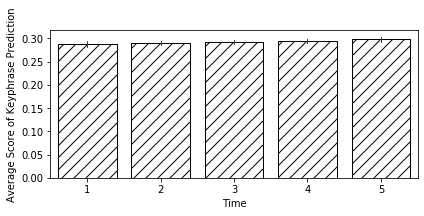

In [42]:
pandas_bar_plot(df=df, x='Time', y='Energy', hue=None, x_name='Time', y_name='Average Score of Keyphrase Prediction', folder='beer', name='energy', save=False)

### Beer Beta 0.0001

In [21]:
df = pd.read_csv("tables/beer_fmap_energy/zero_out/beer_fmap_energy_beta_1e-4.csv")
df['Energy'] /= 75
df.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.662598
1,2,0.663940
2,3,0.671538
3,4,0.680027
4,5,0.689380


No handles with labels found to put in legend.


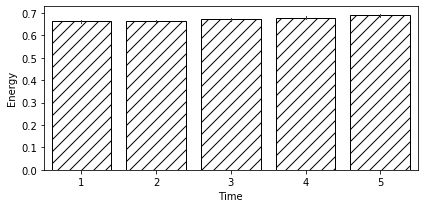

In [22]:
pandas_bar_plot(df=df, x='Time', y='Energy', hue=None, x_name='Time', y_name='Energy', folder='beer', name='energy', save=False)

### Beer Beta 0.0

In [23]:
df = pd.read_csv("tables/beer_fmap_energy/zero_out/beer_fmap_energy_beta_0.csv")
df['Energy'] /= 75
df.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.678771
1,2,0.667435
2,3,0.662042
3,4,0.659381
4,5,0.657821


No handles with labels found to put in legend.


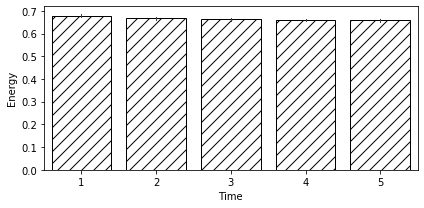

In [24]:
pandas_bar_plot(df=df, x='Time', y='Energy', hue=None, x_name='Time', y_name='Energy', folder='beer', name='energy', save=False)

### CDsVinyl Beta 1.0

In [34]:
df = pd.read_csv("tables/CDsVinyl_fmap_energy/zero_out/CDsVinyl_fmap_energy_beta_1.csv")
df['Energy'] /= 40
df.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.287298
1,2,0.283710
2,3,0.278569
3,4,0.273020
4,5,0.267574


No handles with labels found to put in legend.


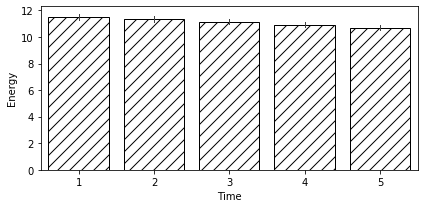

In [11]:
pandas_bar_plot(df=df, x='Time', y='Energy', hue=None, x_name='Time', y_name='Energy', folder='CDsVinyl', name='energy', save=False)

### CDsVinyl Beta 1e-4

In [4]:
df_zero_out = pd.read_csv("tables/CDsVinyl_fmap_energy/zero_out/CDsVinyl_fmap_energy_beta_1e-4.csv")
df_zero_out['Energy'] /= 40
df_zero_out.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.291216
1,2,0.283083
2,3,0.273586
3,4,0.263645
4,5,0.253837


No handles with labels found to put in legend.


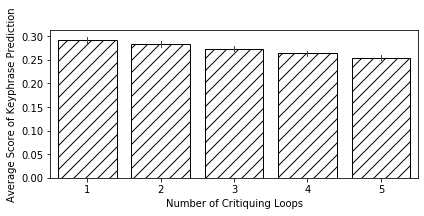

In [47]:
pandas_bar_plot(df=df_zero_out, x='Time', y='Energy', hue=None, x_name='Number of Critiquing Loops', y_name='Average Score of Keyphrase Prediction', folder='CDsVinyl', name='energy', save=False)

### CDsVinyl Beta 0

In [5]:
df_line = pd.read_csv("tables/CDsVinyl_fmap_energy/zero_out/CDsVinyl_fmap_energy_beta_0.csv")
df_line['Energy'] /= 40
df_line['Time'] -= 1
df_line.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,0,0.289702
1,1,0.281569
2,2,0.271958
3,3,0.261989
4,4,0.252202


No handles with labels found to put in legend.


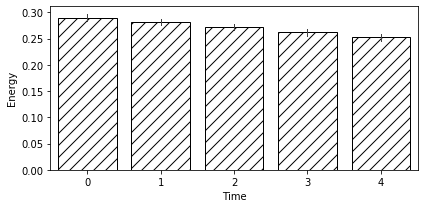

In [81]:
pandas_bar_plot(df=df_line, x='Time', y='Energy', hue=None, x_name='Time', y_name='Energy', folder='CDsVinyl', name='energy', save=False)

In [6]:
def pandas_line_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.pointplot(ax=ax, x=x, y=y, data=df, linestyles=["--"])

#     num_category = len(df[x].unique())
#     hatch = None
#     hatches = itertools.cycle(['//', '**', '////', '----', 'xxxx', '\\\\\\\\', ' ', '\\', '...', 'OOO', "++++++++"])
#     for i, bar in enumerate(ax.patches):
#         if i % num_category == 0:
#             hatch = next(hatches)
#         bar.set_hatch(hatch)
#     ax.set(ylim=(0, 0.4))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper left', ncol=5)
    # if 'Precision' not in y:
    ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_bar.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_bar.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(5, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=3)
        ax_leg.axis('off')
        fig_leg.savefig('figs/bar_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

No handles with labels found to put in legend.
/home/kai/git/Dual-Encoder/utils/io.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)[key]


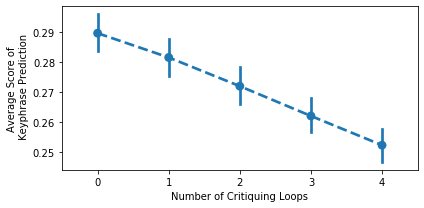

In [7]:
pandas_line_plot(df=df_line, x='Time', y='Energy', hue=None, x_name='Number of Critiquing Loops', y_name='Average Score of\n Keyphrase Prediction', folder='Energy', name='energy_critiquing_zero_out', save=True)

# Redistribute

### Beer Beta 0.0

In [25]:
df = pd.read_csv("tables/beer_fmap_energy/redistribute/beer_fmap_energy_beta_0.csv")
df['Energy'] /= 75
df.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.673103
1,2,0.660451
2,3,0.653302
3,4,0.650319
4,5,0.650521


No handles with labels found to put in legend.


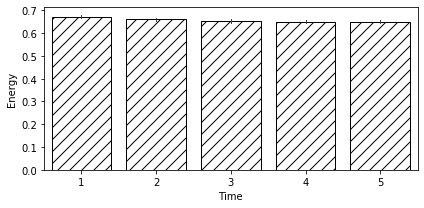

In [26]:
pandas_bar_plot(df=df, x='Time', y='Energy', hue=None, x_name='Time', y_name='Energy', folder='beer', name='energy', save=False)

### Beer Beta 1.0

In [27]:
df = pd.read_csv("tables/beer_fmap_energy/redistribute/beer_fmap_energy_beta_1.csv")
df['Energy'] /= 75
df.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.674232
1,2,0.676602
2,3,0.678901
3,4,0.680750
4,5,0.681637


No handles with labels found to put in legend.


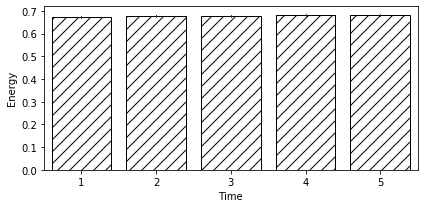

In [28]:
pandas_bar_plot(df=df, x='Time', y='Energy', hue=None, x_name='Time', y_name='Energy', folder='beer', name='energy', save=False)

### CDsVinyl Beta 0.0

In [74]:
df = pd.read_csv("tables/CDsVinyl_fmap_energy/redistribute/CDsVinyl_fmap_energy_beta_0.csv")
df['Energy'] /= 40
df['Time'] -= 1
df.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,0,0.288301
1,1,0.286920
2,2,0.286104
3,3,0.285475
4,4,0.284934


No handles with labels found to put in legend.


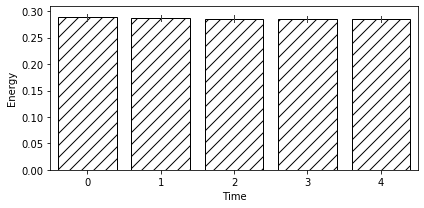

In [75]:
pandas_bar_plot(df=df, x='Time', y='Energy', hue=None, x_name='Time', y_name='Energy', folder='CDsVinyl', name='energy', save=False)

### CDsVinyl Beta 0.0001

In [8]:
df_redistribute = pd.read_csv("tables/CDsVinyl_fmap_energy/redistribute/CDsVinyl_fmap_energy_beta_1e-4.csv")
df_redistribute['Energy'] /= 40
df_redistribute.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.290266
1,2,0.288896
2,3,0.288139
3,4,0.287721
4,5,0.287336


No handles with labels found to put in legend.


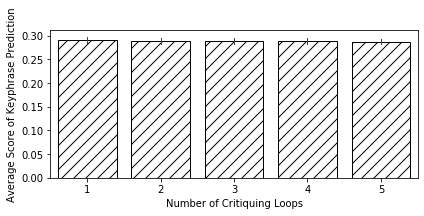

In [50]:
pandas_bar_plot(df=df_redistribute, x='Time', y='Energy', hue=None, x_name='Number of Critiquing Loops', y_name='Average Score of Keyphrase Prediction', folder='CDsVinyl', name='energy', save=False)

### CDsVinyl Beta 1.0

In [40]:
df = pd.read_csv("tables/CDsVinyl_fmap_energy/redistribute/CDsVinyl_fmap_energy_beta_1.csv")
df['Energy'] /= 40
df.groupby('Time', as_index=False).agg({'Energy': 'mean'})

,Time,Energy
0,1,0.287814
1,2,0.289655
2,3,0.291968
3,4,0.294683
4,5,0.297696


No handles with labels found to put in legend.


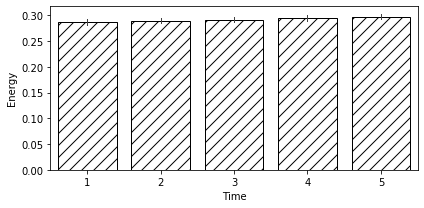

In [41]:
pandas_bar_plot(df=df, x='Time', y='Energy', hue=None, x_name='Time', y_name='Energy', folder='CDsVinyl', name='energy', save=False)

In [9]:
df_zero_out['Critiquing Function'] = "Zero Out"

In [10]:
df_zero_out.head()

,User,Time,Energy,Critiquing Function
0,2732,1,0.197472,Zero Out
1,2732,2,0.195186,Zero Out
2,2732,3,0.188077,Zero Out
3,2732,4,0.175828,Zero Out
4,2732,5,0.166811,Zero Out


In [11]:
df_redistribute['Critiquing Function'] = "Energy Redistribution"

In [12]:
df_redistribute.head()

,User,Time,Energy,Critiquing Function
0,2732,1,0.194655,Energy Redistribution
1,2732,2,0.196230,Energy Redistribution
2,2732,3,0.196776,Energy Redistribution
3,2732,4,0.195197,Energy Redistribution
4,2732,5,0.194054,Energy Redistribution


In [13]:
df_combined = df_redistribute.append(df_zero_out)
df_combined['Time'] -= 1

/home/kai/git/Dual-Encoder/utils/io.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)[key]


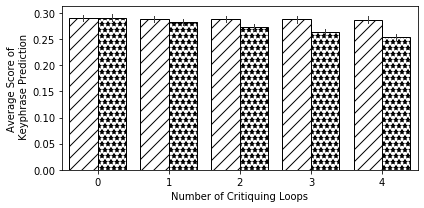

In [14]:
pandas_bar_plot(df=df_combined, x='Time', y='Energy', hue='Critiquing Function', x_name='Number of Critiquing Loops', y_name='Average Score of\n Keyphrase Prediction', folder='Energy', name='energy_critiquing', save=True)